In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [14]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [15]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [16]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-57.17364278017124 28.85384907854086
-78.96624673136513 13.83116099122256
-15.348218073077987 107.38329456541356
-46.447752912550854 -120.18102786317381
59.647028887060486 35.48706075139418
-0.19296716572077344 91.31312558997087
-42.03633532387032 -27.555110535888616
-52.239986676387076 -128.65055948142907
49.883871137301924 70.8950429592287
-64.52708241427747 178.67277901003786
0.9129638105090834 -79.65020521730621
88.39692199066496 -7.999681924144369
82.18509030027201 133.97235314894004
-89.78983091475794 -94.46797172056387
57.87062018518796 56.20756928604766
8.6164838339907 158.4085043197299
76.4669570434022 -86.39862421065871
66.51152879930291 -12.08102846541081
4.706205217535796 -109.76300325389049
-88.08927372683286 -39.8144812522969
-82.90963032961561 -77.19786172296341
-56.7080439915319 -176.74912678412844
-7.1359158847622695 -94.34163986628617
-24.891094794343488 52.808944293533386
5.375387253984513 -97.26580678666119
-24.16314518167681 -108.5860562189576
-30.22363276410549 56

In [17]:
from citipy import citipy

In [18]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

649

In [19]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [20]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

# Create counters.
record_count = 1
set_count = 1

Beginning Data Retrieval     
-----------------------------


In [21]:
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | port elizabeth
Processing Record 2 of Set 1 | bredasdorp
Processing Record 3 of Set 1 | srandakan
Processing Record 4 of Set 1 | rikitea
Processing Record 5 of Set 1 | nikolskoye
Processing Record 6 of Set 1 | meulaboh
Processing Record 7 of Set 1 | arraial do cabo
Processing Record 8 of Set 1 | astana
Processing Record 9 of Set 1 | kaitangata
Processing Record 10 of Set 1 | esmeraldas
Processing Record 11 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 12 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 13 of Set 1 | punta arenas
Processing Record 14 of Set 1 | lobanovo
Processing Record 15 of Set 1 | kavieng
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | hofn
Processing Record 18 of Set 1 | lazaro cardenas
Processing Record 19 of Set 1 | ushuaia
Processing Record 20 of Set 1 | vaini
Processing Record 21 of Set 1 | puerto ayora
Processing Record 22 of Set 1 | saint-pierre
Processing R

Processing Record 41 of Set 4 | klaksvik
Processing Record 42 of Set 4 | damaturu
Processing Record 43 of Set 4 | la palma
Processing Record 44 of Set 4 | vangaindrano
Processing Record 45 of Set 4 | chokurdakh
Processing Record 46 of Set 4 | shanhetun
Processing Record 47 of Set 4 | kieta
Processing Record 48 of Set 4 | shwebo
Processing Record 49 of Set 4 | bathsheba
Processing Record 50 of Set 4 | provideniya
Processing Record 1 of Set 5 | rio grande
Processing Record 2 of Set 5 | sisimiut
Processing Record 3 of Set 5 | lavrentiya
Processing Record 4 of Set 5 | nishihara
Processing Record 5 of Set 5 | tevaitoa
Processing Record 6 of Set 5 | geraldton
Processing Record 7 of Set 5 | pangnirtung
Processing Record 8 of Set 5 | envira
Processing Record 9 of Set 5 | verkhoturye
Processing Record 10 of Set 5 | karkal
Processing Record 11 of Set 5 | clyde river
Processing Record 12 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 13 of Set 5 | hami
Processing Record 14 o

Processing Record 26 of Set 8 | nizwa
Processing Record 27 of Set 8 | neuquen
Processing Record 28 of Set 8 | petrolina
Processing Record 29 of Set 8 | ust-nera
Processing Record 30 of Set 8 | saint george
Processing Record 31 of Set 8 | la ronge
Processing Record 32 of Set 8 | nanakuli
Processing Record 33 of Set 8 | impfondo
Processing Record 34 of Set 8 | zhigansk
Processing Record 35 of Set 8 | magna
Processing Record 36 of Set 8 | mumford
Processing Record 37 of Set 8 | taicheng
Processing Record 38 of Set 8 | galle
Processing Record 39 of Set 8 | bilma
Processing Record 40 of Set 8 | vila franca do campo
Processing Record 41 of Set 8 | paamiut
Processing Record 42 of Set 8 | san quintin
Processing Record 43 of Set 8 | bay roberts
Processing Record 44 of Set 8 | puerto narino
Processing Record 45 of Set 8 | tazovskiy
Processing Record 46 of Set 8 | yanchukan
City not found. Skipping...
Processing Record 47 of Set 8 | chegdomyn
Processing Record 48 of Set 8 | port shepstone
Process

Processing Record 17 of Set 12 | jiuquan
Processing Record 18 of Set 12 | iquique
Processing Record 19 of Set 12 | champerico
Processing Record 20 of Set 12 | port hardy
Processing Record 21 of Set 12 | zelenoborsk
Processing Record 22 of Set 12 | upington
Processing Record 23 of Set 12 | betsiamites
Processing Record 24 of Set 12 | gat
Processing Record 25 of Set 12 | lima
Processing Record 26 of Set 12 | scarborough
Processing Record 27 of Set 12 | oudtshoorn
Processing Record 28 of Set 12 | atbasar
Processing Record 29 of Set 12 | mezen
Processing Record 30 of Set 12 | chapulhuacan
Processing Record 31 of Set 12 | coihueco
Processing Record 32 of Set 12 | mazatlan
Processing Record 33 of Set 12 | rio gallegos
Processing Record 34 of Set 12 | bairnsdale
Processing Record 35 of Set 12 | severobaykalsk
Processing Record 36 of Set 12 | mbamba
Processing Record 37 of Set 12 | oktyabrskoye
Processing Record 38 of Set 12 | katsuura
Processing Record 39 of Set 12 | sobolevo
Processing Recor

In [22]:
len(city_data)

596

In [23]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Elizabeth,-33.9180,25.5701,59.09,85,3,8.99,ZA,2022-08-25 20:15:58
1,Bredasdorp,-34.5322,20.0403,51.12,66,4,8.05,ZA,2022-08-25 20:15:58
2,Srandakan,-7.9386,110.2506,74.30,89,27,7.58,ID,2022-08-25 20:15:58
3,Rikitea,-23.1203,-134.9692,67.48,66,100,24.32,PF,2022-08-25 20:15:59
4,Nikolskoye,59.7035,30.7861,64.29,81,100,6.49,RU,2022-08-25 20:15:59
5,Meulaboh,4.1363,96.1285,74.84,93,100,6.29,ID,2022-08-25 20:15:59
6,Arraial Do Cabo,-22.9661,-42.0278,73.36,83,0,18.41,BR,2022-08-25 20:16:00
7,Astana,51.1801,71.4460,57.15,67,0,4.47,KZ,2022-08-25 20:16:00
8,Kaitangata,-46.2817,169.8464,36.75,88,5,4.68,NZ,2022-08-25 20:16:00
9,Esmeraldas,-19.7625,-44.3139,75.31,40,99,12.26,BR,2022-08-25 20:16:01


In [27]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]

In [28]:
city_data_df = city_data_df[new_column_order]
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Elizabeth,ZA,2022-08-25 20:15:58,-33.9180,25.5701,59.09,85,3,8.99
1,Bredasdorp,ZA,2022-08-25 20:15:58,-34.5322,20.0403,51.12,66,4,8.05
2,Srandakan,ID,2022-08-25 20:15:58,-7.9386,110.2506,74.30,89,27,7.58
3,Rikitea,PF,2022-08-25 20:15:59,-23.1203,-134.9692,67.48,66,100,24.32
4,Nikolskoye,RU,2022-08-25 20:15:59,59.7035,30.7861,64.29,81,100,6.49


In [29]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [30]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

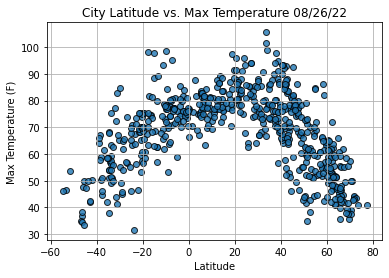

In [31]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

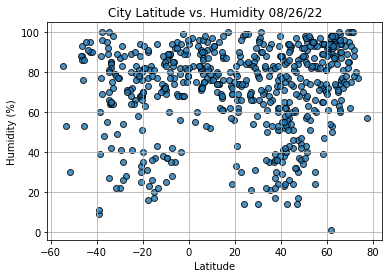

In [32]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

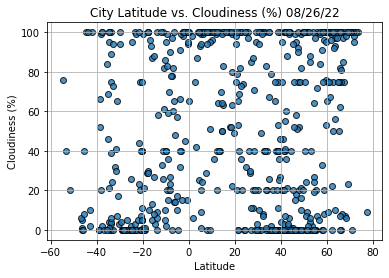

In [33]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

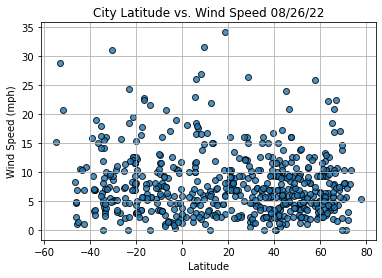

In [34]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()